<a id="1.Summary"></a>
# 1.Summary

<a id="2.Table of Contents"></a>
# 2.Tabole of Contents
<a href="#1.Summary">Click this Link back to Top</a>

<ol>
    <li><a href="#1.Summary">Summary</a></li>
    <li><a href="#2.Tabole of Contents">Tabole of Contents</a></li>
    <li><a href="#3.Import Packages">Import Packages</a></li>
    <li><a href="#4.First Part">First Part</a></li>
    <li><a href="#5.Second Part">Second Part</a></li>
    <li><a href="#6.Main Function">Main Function</a></li>
</ol>

<br>

<a id="3.Import Packages"></a>
# 3.Import Packages
<a href="#2.Table of Contents">Click this Link back to Top</a>

In [55]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 
# get max itme value
import operator

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# check Multicollinearity
from sklearn.decomposition import PCA   
from sklearn.preprocessing import StandardScaler
# cross-validation
from sklearn.model_selection import cross_val_score
# logsitic regression
from sklearn.linear_model import LogisticRegression
# decision tree
from sklearn.tree import DecisionTreeClassifier
# SVM classifer too waste time
from sklearn.svm import SVC
# SVM linear
from sklearn.svm import LinearSVC
# AdaBosst
from sklearn.ensemble import AdaBoostClassifier
# metrics
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV



# from tensorflow.keras.layers import (Embedding, Dense, Conv1D, MaxPooling1D,
# Dropout, Activation, Input, Flatten, Concatenate, LSTM, GlobalAveragePooling1D)
# # do not use sequential to build model
# from tensorflow.keras import Model

<br>

<a id="4.First Part"></a>
# 4.First Part
<a href="#2.Table of Contents">Click this Link back to Top</a>

In [2]:
class FirstPart(object):
    """
    """
    def __init__(self):
        pass
    
    def import_data(self):
        """
        
        """
        df = pd.read_csv('03_data/42_credit-data-post-import.csv')
        
        # only monthly_income have NaN value, if some column have nan value, this column will be True
        print("Output of which colunm have NaN values")
        print(df.isna().any())
        # find which column have True get it corresponding index and get it value
        nan_index_name = df.isna().any().index[df.isna().any()].values
        print(f"From the list, we can know that only {nan_index_name} column contain NaN value")
        
        y = df[nan_index_name]
        # we only use this function to split whole dataframe into df_train and df_test two part. Not X and y splist
        df_train, df_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=1024)
        
        return df, df_train, df_test, y_train, y_test
        

        
    def split_null(self, df):
        """
        input can be df_train or df_test
        """
        # how many rows have nan value in ['monthly'] columns
        nan_count = df['monthly_income'].isna().sum()
        #next step we extract the row which have nan value. Find the boolean result in this columna and apply to DataFrame
        df_null = df[df.isna().any(axis=1)]
        #check result, if nan_count and self.df_null have same length, nothin happens
        assert nan_count == len(df_null)
        #next step we extract the row dont have NaN value
        df_clean = df.dropna()
        
        return df_clean, df_null
    
    def data_analysis(self):
        """
        """
        PCA_model=PCA()
        component_ = PCA_model.fit(X)
        plt.plot(PCA_model.explained_variance_ratio_.cumsum())
        print(PCA_model.explained_variance_ratio_)
        print(PCA_model.explained_variance_)
        print(PCA_model.components_)
        
        df_2 = df_clean_train.drop(columns= 'monthly_income')
        df_2.insert(0, 'monthly_income', df_clean_train['monthly_income'])
        sns.heatmap(df_2.corr(),xticklabels=False, yticklabels=False,cmap='RdBu')
        
        sns.heatmap(df.corr(),xticklabels=False, yticklabels=False,cmap='RdBu')
        
        
    def nn_model(self):
        """
        due to linear regession is not performance well
        """
        scaler = StandardScaler()
        # >>> print(scaler.fit())
        arr_scaler = scaler.fit_transform(df_clean_train)
        X = np.delete(arr_scaler, 5, 1)
        y = arr_scaler[:,5]
        # X = df_scaler.drop(columns='monthly_income')
        # y= df_scaler['monthly_income']
        
        
        model = None
        input_layer_1 = Input(shape=(10,))
        dense_layer_2 = Dense(128, activation='relu')(input_layer_1)
        dense_layer_3 = Dense(32,activation = 'relu')(dense_layer_2)
        output_layer_4 = Dense(1)(dense_layer_3)
        model = Model(inputs = input_layer_1, outputs = output_layer_4, name='Simple_NN')
        model.summary()
        model.compile(loss='mse', optimizer='adam',metrics = ['mse','mae'])
        history = model.fit(X,y,epochs=10, batch_size=32, verbose =1)
        
        
        ran = np.random.randint(0,9000, 20)
        X_val = X[ran,:]
        y_val = y[ran]
        test_predictions = model.predict(X_val)
        plt.scatter(x = y_val, y = test_predictions)
        plt.xlabel('True Values')
        plt.ylabel('Predictions')
        plt.axis('equal')
        plt.axis('square')
        # plt.xlim([0,plt.xlim()[1]])
        # plt.ylim([0,plt.ylim()[1]])
        _ = plt.plot([-100, 100], [-100, 100])
        
        
    def reg_model(self, df_clean_train, df_null_train, df_null_test):
        """
        this input is df_clean
        """
        # only two columns will be used as vairbale data
#         X = df.drop(columns='monthly_income')
        X = df_clean_train[['number_of_open_credit_lines_and_loans', 'number_real_estate_loans_or_lines']]
        # monthly_income is our target label
        y = df_clean_train['monthly_income']
        # build model 
        reg_model = LinearRegression().fit(X, y)
        # the score only have 0.17
        score = reg_model.score(X, y)
        # using this model to predict monthly_income and insert them into df_null NaN value
        predict = reg_model.predict(df_null_train[['number_of_open_credit_lines_and_loans', 'number_real_estate_loans_or_lines']])
        # insert into
        df_null_train.loc[:,['monthly_income']] = predict
        # insert NaN value with prediction value
        df_null_test.loc[:,['monthly_income']] = reg_model.predict(df_null_test[['number_of_open_credit_lines_and_loans',
                                                                                  'number_real_estate_loans_or_lines']])
        
        
        return score, reg_model, X, y, df_null_train, df_null_test
    
    def concat_save(self, df_clean_train, df_null_train, df_clean_test, df_null_test):
        """
        """
        frames_train = [df_clean_train, df_null_train]
        # horizontal concatnate
        df_train_new = pd.concat(frames_train)
        # save in 03_data folder
        df_train_new.to_csv('03_data/43_credit-data-trainingset.csv', index=False)
        
        frames_test = [df_clean_test, df_null_test]
        # horizontal concatnate
        df_test_new = pd.concat(frames_test)
        # save in 03_data folder
        df_test_new.to_csv('03_data/44_credit-data-testset.csv', index=False)
        
        return df_train_new, df_test_new
        
    def report(self):
        """
        """
        return None


<br>

<a id="5.Second Part"></a>
# 5.Second Part
<a href="#2.Table of Contents">Click this Link back to Top</a>

In [51]:
class SecondPart(object):
    """
    """
    def model_selection(self, df_clean_train):
        """
        """
        # read dataframe
        self.df_train = pd.read_csv('03_data/43_credit-data-trainingset.csv')
        #extract X and y 
#         self.df_train = df_clean_train
        self.X = self.df_train.drop(columns='serious_dlqin2yrs')
        # using StandardScalr or not didn't affect score too much
        # serious_dlqin2yrs is target to predict
        self.y = self.df_train['serious_dlqin2yrs']
        
        # read dataframe
        self.df_test = pd.read_csv('03_data/44_credit-data-testset.csv')
        #extract X and y 
        self.X_test = self.df_test.drop(columns='serious_dlqin2yrs')
        # using StandardScalr or not didn't affect score too much
        # serious_dlqin2yrs is target to predict
        self.y_test = self.df_test['serious_dlqin2yrs']
        
        
        # logistic regression model
        lg_model = LogisticRegression(random_state=1024)
        # decsion tree
        dt_model = DecisionTreeClassifier(random_state=1024)
        # SVM classifer spend too much time 
#         svc_model = SVC(gamma='auto')
        # so we change to LinearSVC and increase the tolerance
        svc_model = LinearSVC(random_state=0, tol=1e-2)
        # AdaBoost
        abc_model = AdaBoostClassifier(n_estimators=10, learning_rate =0.1, random_state=1024)

        # build a model list to iteration
        model_list = [lg_model, dt_model, svc_model, abc_model]
        cross_score_dict = {}
        for idx, model in enumerate(model_list):
            print(model)
            cross_score = cross_val_score(model, self.X, self.y, cv=3)
            cross_score_dict[model] = cross_score.mean()
        best_model = max(cross_score_dict.items(), key=operator.itemgetter(1))[0]
        print('*'*70)
        print(f"The bset model is {best_model}")
        print('*'*70)
        
        y_score = best_model.fit(self.X, self.y).decision_function(self.X_test)
        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)

#         # Compute micro-average ROC curve and ROC area
#         fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#         roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        
        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',
                 lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()
        
        parameters = {'tol':[1e-2, 1e-3, 1e-4, 1e-5], 'C':[1, 5] }
        clf = GridSearchCV(lg_model, parameters)
        clf.fit(self.X, self.y)
        sorted(clf.cv_results_.keys())
        
        
        
        print('*'*70)
        print("Accuracy is {:2.2%}".format(best_model.score(self.X_test,self.y_test)))
        print('*'*70)
        
        return cross_score_dict
        

<br>

<a id="6.Main Function"></a>
# 6.Main Function
<a href="#2.Table of Contents">Click this Link back to Top</a>

In [52]:
def main():
    """
    """
    firstpart_class = FirstPart()
    #****************1.read and get train and test*********************
    df, df_train, df_test, y_train, y_test = firstpart_class.import_data()
    #****************2.split into null datafram and not-null dataframe*********************
    df_clean_train, df_null_train = firstpart_class.split_null(df_train)
    df_clean_test, df_null_test = firstpart_class.split_null(df_test)
    #****************3.train modele*************************
    score, reg_model, X, y, df_null_train, df_null_test = firstpart_class.reg_model(df_clean_train, df_null_train, df_null_test)
    #******************4.concatenate and save file******************
    df_train_new, df_test_new = firstpart_class.concat_save(df_clean_train, df_null_train, df_clean_test, df_null_test)
    
    
    #*****************5.model select by cross-validation**********************
    secondpart_class = SecondPart()
    cross_score_dict = secondpart_class.model_selection(df_clean_train)
    
    return (df, df_train, df_test, y_train, y_test,df_clean_train, df_null_train, score, reg_model, X, y, 
            df_null_train, df_null_test, df_train_new, df_test_new, cross_score_dict)

Output of which colunm have NaN values
serious_dlqin2yrs                              False
revolving_utilization_of_unsecured_lines       False
age                                            False
number_of_time30-59_days_past_due_not_worse    False
debt_ratio                                     False
monthly_income                                  True
number_of_open_credit_lines_and_loans          False
number_of_times90_days_late                    False
number_real_estate_loans_or_lines              False
number_of_time60-89_days_past_due_not_worse    False
number_of_dependents                           False
dtype: bool
From the list, we can know that only ['monthly_income'] column contain NaN value


D:\ProgramData\Anaconda3\envs\08_web_mining\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
D:\ProgramData\Anaconda3\envs\08_web_mining\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


LogisticRegression(random_state=1024)


D:\ProgramData\Anaconda3\envs\08_web_mining\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ProgramData\Anaconda3\envs\08_web_mining\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

DecisionTreeClassifier(random_state=1024)
LinearSVC(random_state=0, tol=0.01)


D:\ProgramData\Anaconda3\envs\08_web_mining\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\ProgramData\Anaconda3\envs\08_web_mining\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\ProgramData\Anaconda3\envs\08_web_mining\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


AdaBoostClassifier(learning_rate=0.1, n_estimators=10, random_state=1024)
**********************************************************************
The bset model is LogisticRegression(random_state=1024)
**********************************************************************


D:\ProgramData\Anaconda3\envs\08_web_mining\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


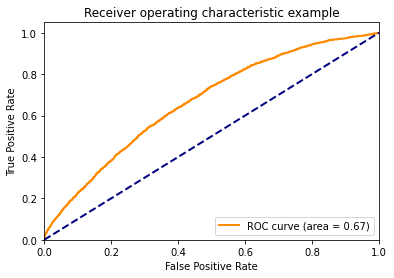

**********************************************************************
Accuracy is 93.29%
**********************************************************************


In [53]:
if __name__=='__main__':
    (df, df_train, df_test, y_train, y_test,df_clean_train, df_null_train, score, reg_model, X, y, 
     df_null_train, df_null_test, df_train_new, df_test_new, cross_score_dict) = main()

<br>

<a id="7.Test Code"></a>
# 7.Test Code
<a href="#2.Table of Contents">Click this Link back to Top</a>

In [62]:
# cross_score_dict

# abc_model = AdaBoostClassifier(n_estimators=100, random_state=1024)



# lg_model = LogisticRegression(random_state=1024)
# parameters = {'tol':[1e-4], 'C':[1] }
# clf = GridSearchCV(lg_model, parameters)
# clf.fit(X, y)
# sort_dict = sorted(clf.cv_results_.keys())





# best_model = LogisticRegression(random_state=1024)

#  print("Accuracy is {:2.2%}".format(best_model.score(X_test,y_test)))

# y_score = best_model.fit(X, y).decision_function(X_test)
# # Compute ROC curve and ROC area for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# fpr, tpr, _ = roc_curve(y_test, y_score)
# roc_auc = auc(fpr, tpr)

# # # Compute micro-average ROC curve and ROC area
# # fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
# # roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        

# roc_auc

# print(f"Accuracy is {best_model.fit(X_test,y_test).score}")

# best_model.score(X_test,y_test)

# plt.figure()
# lw = 2
# plt.plot(fpr, tpr, color='darkorange',
#          lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
# plt.show()

# a = roc_curve(y_test.ravel(), y_score.ravel())

# a.shape

# y_score = abc_model.fit(X, y).decision_function(X_test)

# .decision_function(X_test)

# df_train = pd.read_csv('03_data/43_credit-data-trainingset.csv')

# X = df_train.iloc[:,1:]
# y = df_train.iloc[:,0]

# df_test = pd.read_csv('03_data/44_credit-data-testset.csv')

# X_test = df_test.iloc[:,1:]
# y_test = df_test.iloc[:,0]

# y_test.isna().any

# svc_model = LinearSVC(random_state=0, tol=1e-2)

# svc = svc_model.fit(X, y)

# cross_score = cross_val_score(svc_model, X, y, cv=3)

# cross_score

# svc_model.__class__

# df_test_new.shape

# score

# sc = StandardScaler()

# type(sc)

# df_train_new

# X = df_train_new.iloc[:,1:]
# y = df_train_new.iloc[:,0]

# X = df_clean_train.iloc[:,1:]
# y = df_clean_train.iloc[:,0]

# scaler = StandardScaler()
# # >>> print(scaler.fit())
# X_scaler = scaler.fit_transform(X)

# X_scaler.shape

# lg_model = LogisticRegression(penalty='l2', random_state = 1024)

# X.shape

# y_score = AdaBoostClassifier.fit(self.X, self.y).decision_function(X_test)

# clf = lg_model.fit(X,y)

# X_test = df_test_new.iloc[:,1:]
# y_test = df_test_new.iloc[:,0]
# X_test_scaler = scaler.fit_transform(X_test)

# clf.score(X,y)

# score = cross_val_score(lg_model, X, y, cv=3)

# score




# ran = np.random.randint(0,9000, 20)
# X_val = X[ran,:]
# y_val = y[ran]
# test_predictions = model.predict(X_val)
# plt.scatter(x = y_val, y = test_predictions)
# plt.xlabel('True Values')
# plt.ylabel('Predictions')
# plt.axis('equal')
# plt.axis('square')
# # plt.xlim([0,plt.xlim()[1]])
# # plt.ylim([0,plt.ylim()[1]])
# _ = plt.plot([-100, 100], [-100, 100])